# Topic Modelling

## LDA - Latent Drichilet Allocation

**Dependenices**

In [7]:
#Dependencies
import pandas as pd
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim #LDA visualization library

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.simplefilter('ignore')
from itertools import chain

**Read News articles pickle file**

In [38]:
df = pd.read_csv('moreshuffled.csv')
res = df.values.tolist()
main_ls = []
for l in res:
    for a in l:
        main_ls.append(a)

In [40]:
temp = dict({'text':main_ls})
df2 = pd.DataFrame(temp)
df2['text']

0      Yes, the implementation of DaaS and VDI in the...
1      Yes, using DaaS and VDI can improve PO users' ...
2      Yes, using the DaaS and VDI in the PO job defi...
3      Yes, using the DaaS and VDI can enhance PO use...
4      Using DaaS and VDI can make it easier for PO u...
                             ...                        
379    Generally, PO users find it relatively easy to...
380    Yes, PO users' interaction with DaaS and VDI i...
381    Yes, PO employees find DaaS and VDI flexible t...
382    It is possible for PO users to become skillful...
383     Yes, PO (Point of Sale) users can find DaaS (...
Name: text, Length: 384, dtype: object

**Clean the data**

In [45]:
#clean the data
import nltk
nltk.download('wordnet')
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jahan\AppData\Roaming\nltk_data...


In [46]:
df2['text_clean']=df2['text'].apply(clean)

In [102]:
from nltk import pos_tag
df = df2
stop_words = set(stopwords.words('english'))

# Function to filter out unnecessary keywords
def filter_unnecessary_keywords(words_list):
    # POS tagging to keep only adjectives (JJ)
    words_with_pos = pos_tag(words_list)
    return [word for word, pos in words_with_pos if pos.startswith('JJ') and word not in stop_words]

# Apply the filtering to the 'text_clean' column
df['text_clean'] = df['text_clean'].apply(filter_unnecessary_keywords)


In [101]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jahan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [103]:
df

,text,text_clean
0,"Yes, the implementation of DaaS and VDI in the...","[enable, accomplish, local, deployed, provided..."
1,"Yes, using DaaS and VDI can improve PO users' ...","[efficient, present, cloud, multiple, bulky, l..."
2,"Yes, using the DaaS and VDI in the PO job defi...","[increase, able, fewer, complete, potential, v..."
3,"Yes, using the DaaS and VDI can enhance PO use...","[users’, cloud, virtual, better, physical]"
4,Using DaaS and VDI can make it easier for PO u...,"[easier, desktop, large, easier, easier, recen..."
...,...,...
379,"Generally, PO users find it relatively easy to...","[easy, want, wide, allow, remote, cloudbased, ..."
380,"Yes, PO users' interaction with DaaS and VDI i...","[clear, understandable, professional, assist, ..."
381,"Yes, PO employees find DaaS and VDI flexible t...","[flexible, interact, cloudbased, remote, physi..."
382,It is possible for PO users to become skillful...,"[possible, skillful, technical, right, comfort..."


**Dataframe after cleaning**

In [86]:
df2
df = df2
keywords_to_remove = ['daas', 'vdi', 'po', 'user', 'yes', 'no', 'data', 'may','use','using','job','application']

# Function to remove the keywords from each row in the 'text_clean' column
def remove_keywords(row):
    return [word for word in row if word not in keywords_to_remove]

# Apply the function to the 'text_clean' column
df['text_clean'] = df['text_clean'].apply(remove_keywords)
print(df)

                                                  text  \
0    Yes, the implementation of DaaS and VDI in the...   
1    Yes, using DaaS and VDI can improve PO users' ...   
2    Yes, using the DaaS and VDI in the PO job defi...   
3    Yes, using the DaaS and VDI can enhance PO use...   
4    Using DaaS and VDI can make it easier for PO u...   
..                                                 ...   
379  Generally, PO users find it relatively easy to...   
380  Yes, PO users' interaction with DaaS and VDI i...   
381  Yes, PO employees find DaaS and VDI flexible t...   
382  It is possible for PO users to become skillful...   
383   Yes, PO (Point of Sale) users can find DaaS (...   

                                            text_clean  
0    [implementation, enable, accomplish, task, qui...  
1    [improve, performance, utilizing, access, reso...  
2    [definitely, increase, productivity, virtualiz...  
3    [enhance, users’, effectiveness, significantly...  
4    [make, easier

**Create Dictionary from the articles**

In [110]:
#create dictionary
dictionary = corpora.Dictionary(df['text_clean'])
#Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

3356


**Create document term matrix**

In [111]:
#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['text_clean'] ]
print(len(doc_term_matrix))

384


**Instantiate LDA model**

In [112]:
lda = gensim.models.ldamodel.LdaModel

**Fit LDA model on the dataset**

In [113]:
num_topics=2
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

CPU times: total: 3.58 s
Wall time: 6.43 s


**Print the topics identified by LDA model**

In [114]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.070*"easier" + 0.027*"easy" + 0.026*"virtual" + 0.023*"flexible" + 0.023*"physical" + 0.019*"due" + 0.018*"efficient" + 0.018*"users’" + 0.017*"reliable" + 0.017*"productive"'),
 (1,
  '0.053*"difficult" + 0.049*"easy" + 0.046*"new" + 0.027*"technical" + 0.024*"many" + 0.024*"traditional" + 0.019*"additional" + 0.017*"clear" + 0.017*"certain" + 0.017*"intuitive"')]

**Visualize the LDA model results**

In [115]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

**Find which articles were marked in which cluster**

In [68]:
# Assigns the topics to the documents in corpus
lda_corpus = ldamodel[doc_term_matrix]

In [69]:
[doc for doc in lda_corpus]

[[(0, 0.04089914), (1, 0.9591008)],
 [(0, 0.009014287), (1, 0.99098575)],
 [(0, 0.008934821), (1, 0.9910652)],
 [(0, 0.012045404), (1, 0.9879546)],
 [(0, 0.011355726), (1, 0.9886443)],
 [(0, 0.011798169), (1, 0.98820186)],
 [(0, 0.65377575), (1, 0.34622428)],
 [(0, 0.48243216), (1, 0.5175678)],
 [(0, 0.938398), (1, 0.061602015)],
 [(0, 0.016748147), (1, 0.98325187)],
 [(0, 0.12746057), (1, 0.8725394)],
 [(0, 0.020616125), (1, 0.9793839)],
 [(0, 0.98114884), (1, 0.018851139)],
 [(0, 0.54305315), (1, 0.45694685)],
 [(0, 0.98714966), (1, 0.012850357)],
 [(0, 0.7888663), (1, 0.21113373)],
 [(0, 0.8009622), (1, 0.19903775)],
 [(0, 0.6708548), (1, 0.3291452)],
 [(0, 0.98642844), (1, 0.013571532)],
 [(0, 0.98271364), (1, 0.01728633)],
 [(0, 0.9842564), (1, 0.015743606)],
 [(0, 0.40375206), (1, 0.596248)],
 [(0, 0.8888106), (1, 0.11118944)],
 [(0, 0.98494625), (1, 0.015053786)],
 [(0, 0.97707), (1, 0.022929998)],
 [(0, 0.2572855), (1, 0.74271446)],
 [(0, 0.82612073), (1, 0.1738793)],
 [(0, 0.6

In [70]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))

threshold = sum(scores)/len(scores)
print(threshold)

0.49999999893831654


In [72]:
cluster1 = [j for i,j in zip(lda_corpus,df.index) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,df.index) if i[1][1] > threshold]
#cluster3 = [j for i,j in zip(lda_corpus,df.index) if i[2][1] > threshold]
# cluster4 = [j for i,j in zip(lda_corpus,df.index) if i[3][1] > threshold]
# cluster5 = [j for i,j in zip(lda_corpus,df.index) if i[4][1] > threshold]

print(len(cluster1))
print(len(cluster2))
#print(len(cluster3))
# print(len(cluster4))
# print(len(cluster5))

220
164


In [73]:
df.iloc[cluster1]

,text,text_clean
6,Learning how to operate DaaS and VDI can be qu...,"[learning, operate, daas, vdi, quite, easy, po..."
8,"Yes, the PO users’ interaction with DaaS and V...","[yes, po, users’, interaction, daas, vdi, clea..."
12,"No, DaaS and VDI in the PO job do not enable P...","[no, daas, vdi, po, job, enable, po, user, acc..."
13,"No, using DaaS and VDI does not necessarily im...","[no, using, daas, vdi, necessarily, improve, p..."
14,Using the DaaS and VDI in the PO job may not n...,"[using, daas, vdi, po, job, may, necessarily, ..."
...,...,...
371,"No, PO users do not find DaaS and VDI easy to ...","[no, po, user, find, daas, vdi, easy, use, com..."
374,The answer to your question of whether using D...,"[answer, question, whether, using, daas, vdi, ..."
378,It is possible for PO users to learn how to op...,"[possible, po, user, learn, operate, daas, vdi..."
380,"Yes, PO users' interaction with DaaS and VDI i...","[yes, po, user, interaction, daas, vdi, genera..."


In [74]:
df.iloc[cluster2]

,text,text_clean
0,"Yes, the implementation of DaaS and VDI in the...","[yes, implementation, daas, vdi, po, job, enab..."
1,"Yes, using DaaS and VDI can improve PO users' ...","[yes, using, daas, vdi, improve, po, user, job..."
2,"Yes, using the DaaS and VDI in the PO job defi...","[yes, using, daas, vdi, po, job, definitely, i..."
3,"Yes, using the DaaS and VDI can enhance PO use...","[yes, using, daas, vdi, enhance, po, users’, e..."
4,Using DaaS and VDI can make it easier for PO u...,"[using, daas, vdi, make, easier, po, user, job..."
...,...,...
376,"Yes, using DaaS and VDI can make it easier to ...","[yes, using, daas, vdi, make, easier, po, user..."
377,"Yes, PO users can find DaaS and VDI helpful in...","[yes, po, user, find, daas, vdi, helpful, job,..."
379,"Generally, PO users find it relatively easy to...","[generally, po, user, find, relatively, easy, ..."
381,"Yes, PO employees find DaaS and VDI flexible t...","[yes, po, employee, find, daas, vdi, flexible,..."


In [63]:
df.iloc[cluster3]

,text,text_clean
0,"Yes, the implementation of DaaS and VDI in the...","[yes, implementation, daas, vdi, po, job, enab..."
1,"Yes, using DaaS and VDI can improve PO users' ...","[yes, using, daas, vdi, improve, po, user, job..."
2,"Yes, using the DaaS and VDI in the PO job defi...","[yes, using, daas, vdi, po, job, definitely, i..."
3,"Yes, using the DaaS and VDI can enhance PO use...","[yes, using, daas, vdi, enhance, po, users’, e..."
4,Using DaaS and VDI can make it easier for PO u...,"[using, daas, vdi, make, easier, po, user, job..."
...,...,...
376,"Yes, using DaaS and VDI can make it easier to ...","[yes, using, daas, vdi, make, easier, po, user..."
377,"Yes, PO users can find DaaS and VDI helpful in...","[yes, po, user, find, daas, vdi, helpful, job,..."
379,"Generally, PO users find it relatively easy to...","[generally, po, user, find, relatively, easy, ..."
381,"Yes, PO employees find DaaS and VDI flexible t...","[yes, po, employee, find, daas, vdi, flexible,..."


In [64]:
df.iloc[cluster4]

NameError: name 'cluster4' is not defined

In [ ]:
df.iloc[cluster5]

C:\Users\jahan\AppData\Local\Temp\ipykernel_3804\1723084633.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


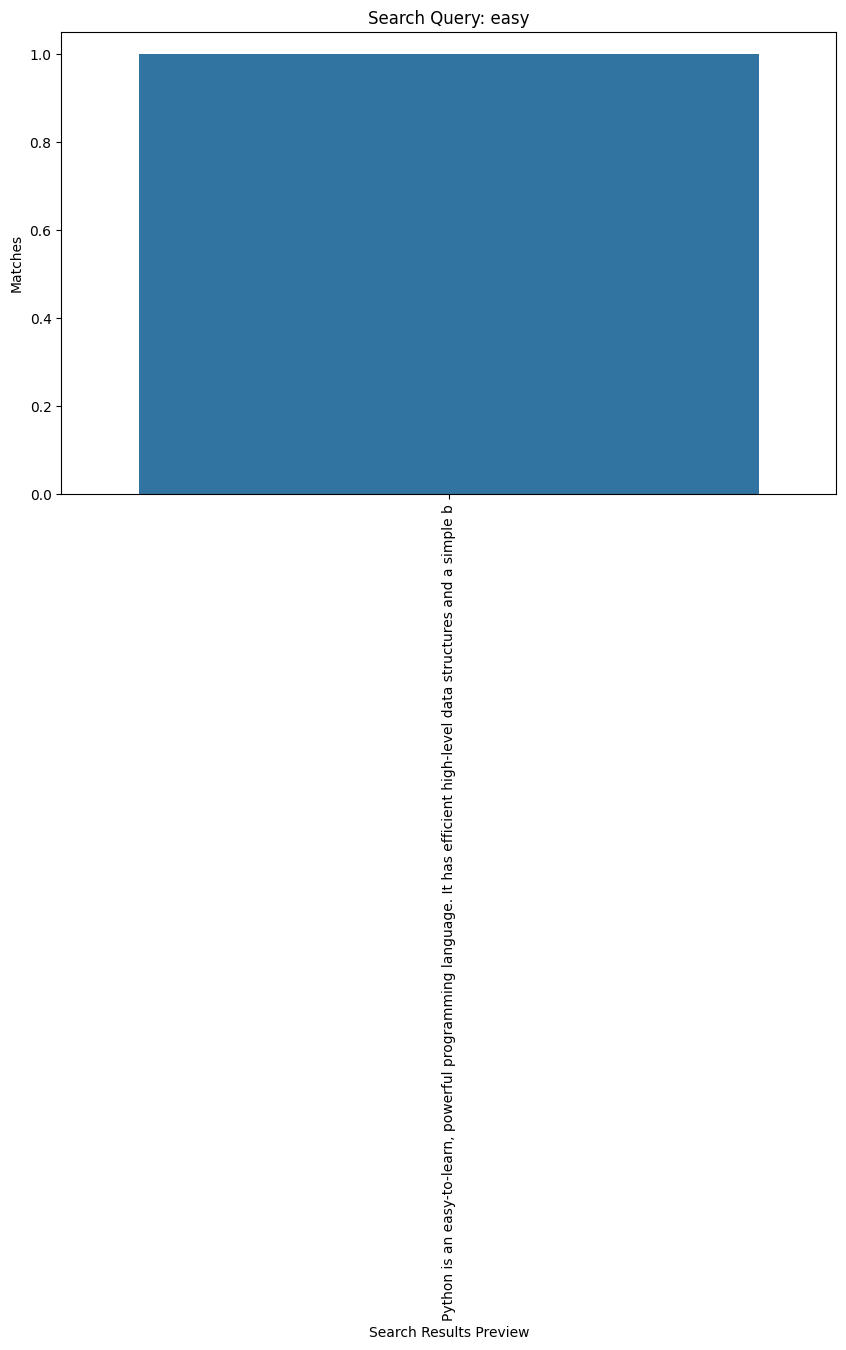

In [12]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

def search_query(query, text):
    # Perform case-insensitive search using regular expression
    search_results = re.finditer(re.escape(query), text, re.IGNORECASE)

    # Extract snippets of matching text with some context
    preview_length = 100
    results = []
    for match in search_results:
        start = max(0, match.start() - preview_length)
        end = min(len(text), match.end() + preview_length)
        preview = text[start:end]
        results.append(preview)

    return results

# Example text for demonstration
example_text = """Python is an easy-to-learn, powerful programming language. It has efficient high-level data structures and a simple but effective approach to object-oriented programming. Python's elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for scripting and rapid application development."""

# Take user input for the search query
search_query_term = "easy"

# Perform search and get preview results
preview_results = search_query(search_query_term, example_text)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=preview_results, y=[1]*len(preview_results))
plt.xlabel('Search Results Preview')
plt.ylabel('Matches')
plt.title(f'Search Query: {search_query_term}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [11]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -----                                 41.0/293.3 kB 991.0 kB/s eta 0:00:01
     -------------------                    153.6/293.3 kB 1.8 MB/s eta 0:00:01
     -------------------------------------  286.7/293.3 kB 2.2 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
